# TUGAS KLASIFIKASI
## Study Case : NPL (Non Performing Loan)

# Kelompok 7 :
1. MOHAMMAD FARIDZ FATHIN (2202680)
2. MUHAMMAD ISHAQ MAULANA (2306654)
3. LEGI KUSWANDI (2203335)
4. SHIDIQ ARIFIN SUDRAJAT (2202152)
5. CAHAYA AULIA FIRDAUSYAH (2006304)
6. KELVIN JULIAN PUTRA (2205101)

### Objektif Notebook

Membuat binary classification problems dengan Python dan library Sckitlearn untuk memprediksi nasabah yang kredit macet. Kolom yang akan menjadi objek prediksi adalah "flag_kredit_macet"

# Alur Notebook

notebook ini dibagi menjadi beberapa bagian:

1.Pemahaman awal terhadap permasalahan.

2.Exploratory Data Analysis (EDA) dan PreProcessing.

3.Feature engineering dan Model building.

# Daftar isi

berikut adalah hal-hal yang akan dilakukan di notebook ini.

1.Problem Statement

2.Hypothesis Generation

3.Loading the data

4.Understanding the data

5.Exploratory Data Analysis (EDA)

    - Univariate Analysis

    - Bivariate Analysis

6.Missing value and outlier treatment

7.Feature Engineering

8.Model Building :
    
    - Naive Bayes

    - Decision Tree

    - Random Forest

    - Random Forest with Grid Search

    - XGBClassifier

# Problem Statement

Problem statement befungsi untuk memberi pemahaman tentang masalah yang akan diselesaikan.

Setiap kelompok mahasiswa diberi tugas oleh Pak Yudi untuk Membuat model terbaik yang bisa memprediksi kredit macet(gagal bayar). Pak Yudi memberi kami Dataset NPL(Non Performing Loan) yang berisi 15.493 data untuk dijadikan bahan latihan serta bahan tes dari model ini.

Tujuan dari notebook kali ini adalah Klasifikasi supervised learning, yaitu memprediksi kolom "flag_kredit_macet" apakah bernilai 0(berhasil bayar) atau 1(gagal bayar).

Kami dilarang untuk menyebarkan dataset ini karena kami bisa terkena blacklist. Semoga Notebook kali ini bisa memberikan manfaat yang baik.

# Hypothesis Generation

Hypothesis Generation berisi faktor-faktor yang diperkirakan memiliki pengaruh terhadap flag_kredit_macet, yaitu :

Berdasarkan model Random Forest yang digunakan, empat kolom yang kemungkinan paling berpengaruh terhadap kredit macet adalah:

1. `outstanding`: Jumlah total utang yang belum dibayar oleh individu atau entitas. Jumlah utang yang tinggi dapat menjadi indikasi risiko kredit yang lebih tinggi.

2. `tagihan`: Merupakan jumlah tagihan terkini yang harus dibayar oleh individu atau entitas. Besarnya tagihan juga dapat menjadi indikator risiko kredit.

3. `rasio_pembayaran_3bulan`: Rasio pembayaran dalam 3 bulan terakhir dibandingkan dengan jumlah tagihan. Rasio pembayaran rendah dalam jangka waktu tersebut dapat menunjukkan masalah pembayaran yang potensial.

4. `utilisasi_3bulan`: Merupakan rasio atau persentase penggunaan kredit dalam 3 bulan terakhir. Penggunaan kredit yang tinggi dalam periode tersebut dapat meningkatkan risiko kredit macet.

Atribut-atribut ini memiliki tingkat kontribusi yang tinggi dalam membuat prediksi kredit macet berdasarkan model Random Forest yang digunakan (kode ada dibawah).

# Penjelasan Data:

berikut adalah deskripsi untuk tiap variabel.


Variabel ----- Deskripsi

`jumlah_kartu` --> total kartu kredit yang dimiliki oleh peminjam.

`outstanding` --> total saldo yang harus dibayarkan oleh peminjam 

`limit_kredit` --> kredit atau batasan maksimum yang diberikan oleh pemberi pinjaman

`tagihan` --> jumlah tagihan yang harus dibayarkan oleh peminjam

`total_pemakaian_tunai` --> jumlah total uang tunai yang ditarik dari kartu kredit oleh peminjam.

`total_pemakaian_retail` --> jumlah total pembelanjaan ritel yang dilakukan oleh peminjam dengan kartu kredit.

`sisa_tagihan_tidak_terbayar` --> jumlah tagihan yang belum dibayar oleh peminjam.

`kode_cabang` --> kode yang mungkin merujuk pada cabang atau lokasi pemberi pinjaman.

`rasio_pembayaran` --> rasio pembayaran, yang menggambarkan sejauh mana peminjam membayar tagihan mereka dalam perbandingan dengan jumlah tagihan.

`persentasi_overlimit` --> persentase sejauh mana peminjam melebihi batas kredit mereka.

`rasio_pembayaran_3bulan` --> rasio pembayaran selama tiga bulan terakhir.

`rasio_pembayaran_6bulan` --> rasio pembayaran selama enam bulan terakhir.

`skor_delikuensi` --> skor yang mungkin digunakan untuk mengukur risiko kredit atau delinkuensi peminjam.

`flag_kredit_macet` --> tanda yang menunjukkan apakah kredit peminjam dalam keadaan macet (1 untuk ya dan 0 untuk tidak).

`jumlah_tahun_sejak_pembukaan_kredit` --> jumlah tahun sejak kartu kredit atau kredit dibuka oleh peminjam.

`total_pemakaian` --> jumlah total pemakaian kartu kredit (termasuk tunai dan ritel).

`sisa_tagihan_per_jumlah_kartu` --> sisa tagihan dibagi oleh jumlah kartu kredit.

`sisa_tagihan_per_limit` --> sisa tagihan dibagi oleh batas kredit (limit).

`total_pemakaian_per_limit` --> total pemakaian dibagi oleh batas kredit (limit).

`pemakaian_3bln_per_limit` --> total pemakaian dalam tiga bulan terakhir dibagi oleh batas kredit (limit).

`pemakaian_6bln_per_limit` --> total pemakaian dalam enam bulan terakhir dibagi oleh batas kredit (limit).

`utilisasi_3bulan` --> utilisasi (penggunaan) dalam tiga bulan terakhir.

`utilisasi_6bulan` --> utilisasi (penggunaan) dalam enam bulan terakhir.

# Import Library yang diperlukan

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore") 

# Data

Data untuk tugas kali ini adalah data yang diberikan Pak Yudi yaitu `npl_train.txt`. File ini berisi 15.493 data yang akan kami split menjadi 2, sebagian untuk pelatihan model dan sebagian lagi untuk tes uji model.

# Membaca Data Train dan Test

In [2]:
df = pd.read_csv("npl_train.txt")

# Menampilkan mean, median, mode(modus), range, deviasi standar. nilai minimum dan maksimum dari setiap tabel

In [3]:
# Membaca dfset (gantilah 'df.csv' dengan nama file dfset Anda)
# df = pd.read_csv('df.csv')

# Menggunakan metode describe() untuk mendapatkan statistik deskriptif
summary_stats = df.describe()

# Mean
mean = df.mean()

# Median
median = df.median()

# Mode(Modus)
mode = df.mode().iloc[0]  # Mode dapat memiliki beberapa nilai, kita mengambil yang pertama.

# Range (nilai maksimum - nilai minimum)
range_val = df.max() - df.min()

# Deviasi Standar
std_deviation = df.std()

# Nilai Minimum
min_value = df.min()

# Nilai Maksimum
max_value = df.max()

# Menampilkan hasil statistik
print("Summary Statistics:")
print(summary_stats)
print("\nMean:")
print(mean)
print("\nMedian:")
print(median)
print("\nMode(Modus):")
print(mode)
print("\nRange:")
print(range_val)
print("\nStandard Deviation:")
print(std_deviation)
print("\nMinimum Value:")
print(min_value)
print("\nMaximum Value:")
print(max_value)

Summary Statistics:
                  X  jumlah_kartu   outstanding  limit_kredit       tagihan  \
count  15493.000000  15493.000000  1.549300e+04  1.549300e+04  1.549300e+04   
mean    7747.000000      2.506551  1.159833e+07  2.079833e+07  8.078663e+06   
std     4472.588196      1.012655  2.408569e+07  2.955334e+07  1.761286e+07   
min        1.000000      1.000000  0.000000e+00  3.000000e+06  2.004300e+04   
25%     3874.000000      2.000000  2.000551e+06  5.000000e+06  8.182500e+05   
50%     7747.000000      2.000000  4.726943e+06  9.000000e+06  3.145857e+06   
75%    11620.000000      3.000000  1.064848e+07  2.200000e+07  7.404991e+06   
max    15493.000000     16.000000  7.980586e+08  1.000000e+09  6.280000e+08   

       total_pemakaian_tunai  total_pemakaian_retail  \
count           1.549300e+04            1.549300e+04   
mean            7.453291e+04            2.025857e+06   
std             6.184139e+05            7.927677e+06   
min             0.000000e+00           -1.56

Dari kode diatas, didapati bahwa kolom target yaitu flag_kredit_macet, dengan count 15493, mean 0.087717, standar deviasi 0.282892, Modus 0, Range 1. Ini berarti lebih banyak orang yang kreditnya tidak macet.

Ini masuk akal, karena modus dari setiap kolom : 
total_pemakaian_tunai                         0.0

total_pemakaian_retail                        0.0

sisa_tagihan_tidak_terbayar                   0.0

kode_cabang                                     A

rasio_pembayaran                              0.0

persentasi_overlimit                          0.0

rasio_pembayaran_3bulan                     100.0

rasio_pembayaran_6bulan                     100.0

skor_delikuensi                               0.0

flag_kredit_macet                             0.0

jumlah_tahun_sejak_pembukaan_kredit           2.0

total_pemakaian                               0.0

sisa_tagihan_per_jumlah_kartu                 0.0

sisa_tagihan_per_limit                        0.0

total_pemakaian_per_limit                     0.0

pemakaian_3bln_per_limit                      0.0

pemakaian_6bln_per_limit                      0.0

utilisasi_3bulan                             1.01

utilisasi_6bulan                              0.0

itu kebanyakan bernilai 0 atau kecil, yang bertanda bahwa kebanyakan orang jarang menggunakan kartu kredit. Kebanyakan jumlah_tahun_sejak_pembukaan_kredit adalah 2, yang bertanda bahwa kebanyakan user kartu kredit adalah user baru yang kemungkinan besar adalah genZ atau milenial.

# Copy data original

Mari kita buat salinan data latih dan data uji sehingga meskipun kita harus membuat perubahan apa pun pada set data ini, kita tidak akan kehilangan set data asli.

In [4]:
train_original = df
pd.options.display.max_columns = 24
train_original.head(30)

,X,jumlah_kartu,outstanding,limit_kredit,tagihan,total_pemakaian_tunai,total_pemakaian_retail,sisa_tagihan_tidak_terbayar,kode_cabang,rasio_pembayaran,persentasi_overlimit,rasio_pembayaran_3bulan,rasio_pembayaran_6bulan,skor_delikuensi,flag_kredit_macet,jumlah_tahun_sejak_pembukaan_kredit,total_pemakaian,sisa_tagihan_per_jumlah_kartu,sisa_tagihan_per_limit,total_pemakaian_per_limit,pemakaian_3bln_per_limit,pemakaian_6bln_per_limit,utilisasi_3bulan,utilisasi_6bulan
0,1,2,36158,7000000.0,23437.0,0.0,94.0,26323.0,I,102.19,0.00,74.78,100.00,0,0,15.416667,94.0,1.316150e+04,0.003760,0.000013,0.011719,0.017810,0.013228,0.021949
1,2,2,268691,10000000.0,254564.0,0.0,1012.0,0.0,A,0.00,0.00,0.00,0.00,0,0,0.750000,1012.0,0.000000e+00,0.000000,0.000101,0.000000,0.000000,0.004232,0.000300
2,3,3,6769149,28000000.0,4159779.0,0.0,0.0,0.0,A,100.00,0.00,100.00,100.91,0,0,10.750000,0.0,0.000000e+00,0.000000,0.000000,0.040518,0.047703,0.249389,0.267853
3,4,4,3496732,21000000.0,111231.0,0.0,2536660.0,581334.0,G,100.00,0.00,25.01,22.64,0,0,19.750000,2536660.0,1.453335e+05,0.027683,0.120793,0.055971,0.016851,0.101912,0.346635
4,5,2,9402085,10000000.0,6099283.0,0.0,2666558.0,5951865.0,A,95.99,0.00,97.49,99.84,0,0,1.666667,2666558.0,2.975932e+06,0.595186,0.266656,0.323027,0.131162,0.707865,0.336571
5,6,2,6227439,80000000.0,2081248.0,0.0,3690250.0,4613435.0,A,0.00,0.00,28.46,42.03,0,0,10.250000,3690250.0,2.306718e+06,0.057668,0.046128,0.017184,0.117513,0.038964,0.181863
6,7,2,3906290,4000000.0,2043682.0,0.0,230400.0,3314046.0,A,18.47,0.00,24.95,17.89,0,0,4.666667,230400.0,1.657023e+06,0.828511,0.057600,0.018750,0.166667,1.014776,0.977231
7,8,4,9534837,20000000.0,3692028.0,0.0,9327612.0,7881069.0,A,58.55,0.00,105.24,166.67,0,0,0.750000,9327612.0,1.970267e+06,0.394053,0.466381,0.239289,0.241599,0.261753,0.224026
8,9,2,4145065,5000000.0,4021399.0,0.0,335680.0,4122425.0,B,15.24,0.00,0.00,33.33,0,0,5.666667,335680.0,2.061212e+06,0.824485,0.067136,0.196042,0.000000,0.470024,0.000000
9,10,4,1818606,7000000.0,1765911.0,0.0,0.0,1627786.0,A,100.00,0.00,58.40,62.68,0,0,8.500000,0.0,4.069465e+05,0.232541,0.000000,0.075000,0.094801,0.315145,0.626448


In [5]:
df['total_pemakaian_tunai'].unique()    

array([       0.,  1300000.,   900000.,  1250000.,   700000.,   500000.,
         800000.,   100000.,    95000.,  1700000.,   300000.,  2000000.,
         600000.,  1194665.,  3601072.,    50000.,  2800000.,   400000.,
        8000000.,  3000000.,  2900000.,  1000000.,  2500000.,  4350000.,
        4000000.,  1648194.,   290000.,  5053700.,  1500000.,   606120.,
        1200000.,   200000.,  2050000.,  3500000.,  1050000., 15000000.,
        2600000.,  5050000.,  3300000.,   150000.,  4250000.,  3100000.,
        2080000.,  3800000.,  2100000.,  2200000.,   350000.,   880000.,
        3600000.,  1100000.,  2400000.,  5000000.,  3900000.,  1600000.,
        2300000.,  4500000.,  4900000.,  3380000.,  7500000.,  1400000.,
         250000.,  8500000.,   550000.,   450000.,  1800000.,  4200000.,
         590000.,  7000000.,  5700000.,  3250000.,  6000000.,   140817.,
        1750000.,   240000.,  1550000.,   750000.,  1150000., 28840572.,
        2650000.,  1579000.,  1850000.,  1900000., 

In [6]:
train_original['persentasi_overlimit'].value_counts()

0.00     11378
16.00       29
10.90       25
12.80       23
14.90       23
         ...  
13.96        1
14.05        1
14.72        1
13.33        1
0.97         1
Name: persentasi_overlimit, Length: 1222, dtype: int64

# Data Understanding

Pada bagian ini, kita akan melihat struktur dataset. Pertama, kita akan memeriksa fitur-fitur yang ada di data kita dan kemudian kita akan melihat tipe datanya.

In [7]:
train_original.columns

Index(['X', 'jumlah_kartu', 'outstanding', 'limit_kredit', 'tagihan',
       'total_pemakaian_tunai', 'total_pemakaian_retail',
       'sisa_tagihan_tidak_terbayar', 'kode_cabang', 'rasio_pembayaran',
       'persentasi_overlimit', 'rasio_pembayaran_3bulan',
       'rasio_pembayaran_6bulan', 'skor_delikuensi', 'flag_kredit_macet',
       'jumlah_tahun_sejak_pembukaan_kredit', 'total_pemakaian',
       'sisa_tagihan_per_jumlah_kartu', 'sisa_tagihan_per_limit',
       'total_pemakaian_per_limit', 'pemakaian_3bln_per_limit',
       'pemakaian_6bln_per_limit', 'utilisasi_3bulan', 'utilisasi_6bulan'],
      dtype='object')

# Print tipe data

In [8]:
train_original.dtypes

X                                        int64
jumlah_kartu                             int64
outstanding                              int64
limit_kredit                           float64
tagihan                                float64
total_pemakaian_tunai                  float64
total_pemakaian_retail                 float64
sisa_tagihan_tidak_terbayar            float64
kode_cabang                             object
rasio_pembayaran                       float64
persentasi_overlimit                   float64
rasio_pembayaran_3bulan                float64
rasio_pembayaran_6bulan                float64
skor_delikuensi                          int64
flag_kredit_macet                        int64
jumlah_tahun_sejak_pembukaan_kredit    float64
total_pemakaian                        float64
sisa_tagihan_per_jumlah_kartu          float64
sisa_tagihan_per_limit                 float64
total_pemakaian_per_limit              float64
pemakaian_3bln_per_limit               float64
pemakaian_6bl

Kalau dilihat dari tipe data setiap atribut semua atribut itu bertipe numerical.

Dapat kita lihat bahwa hanya kode_cabang yang tipe datanya "object", kita akan mengubahnya menjadi numerik nanti karena ada beberapa kode yang hanya menerima data numerik

In [9]:
train_original['jumlah_kartu'].value_counts()

2     10734
3      2795
4      1136
5       460
6       151
1        76
7        75
8        27
9        16
11        7
10        7
13        4
12        2
16        2
15        1
Name: jumlah_kartu, dtype: int64

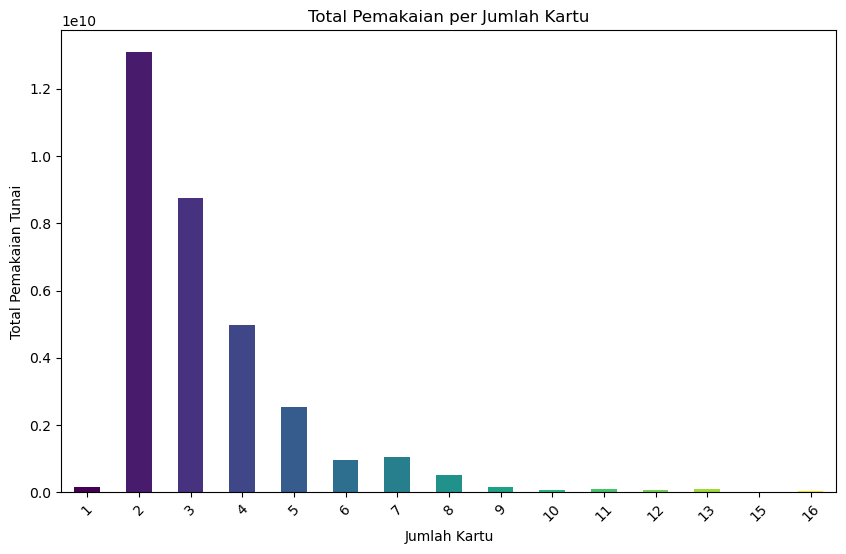

In [10]:
# Mengelompokkan data berdasarkan jumlah_kartu dan menghitung total pemakaian tunai
total_pemakaian_per_jumlah_kartu = train_original.groupby('jumlah_kartu')['total_pemakaian'].sum()

# Membuat warna-warni
colors = plt.cm.viridis(np.linspace(0, 1, len(total_pemakaian_per_jumlah_kartu)))

# Membuat plot dengan warna-warni
plt.figure(figsize=(10, 6))
total_pemakaian_per_jumlah_kartu.plot(kind='bar', color=colors)
plt.title('Total Pemakaian per Jumlah Kartu')
plt.xlabel('Jumlah Kartu')
plt.ylabel('Total Pemakaian Tunai')
plt.xticks(rotation=45)
plt.show()

Berdasarkan plot diatas yang didapat dari penjumlahan pemakaian tunai berdasarkan jumlah kartu, kita dapat lihat bahwa jumlah pemakaian tertinggi ada di jumlah kartu 2 sedangkan jumlah kartu 1 sangat sedikit sekali. ini mengindikasikan bahwa orang yang serius untuk menggunakan kartu kredit, cenderung memiliki lebih dari 1 kartu kredit. Sedangkan orang yang hanya punya 1 kartu kredit kemungkinan punya kartu kredit hanya untuk formalitas atau dipaksa oleh sesuatu(misalnya SPG bank).

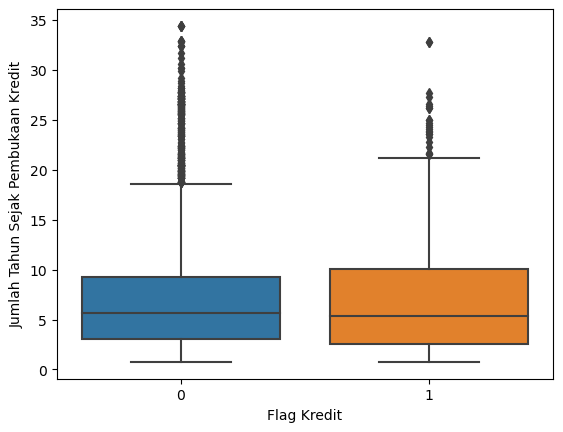

In [11]:
sns.boxplot(data=train_original, x='flag_kredit_macet', y='jumlah_tahun_sejak_pembukaan_kredit')

# Menambahkan label sumbu x dan y
plt.xlabel('Flag Kredit')
plt.ylabel('Jumlah Tahun Sejak Pembukaan Kredit')

# Menampilkan plot
plt.show()

dari plot diatas, bisa dilihat bahwa lama pemakaian orang yang kreditnya macet kebanyakan berkisar antara 4 sampai 10 tahun.

In [12]:
train_original['skor_delikuensi'].value_counts()

0    15451
1       29
2        4
4        4
5        3
3        2
Name: skor_delikuensi, dtype: int64

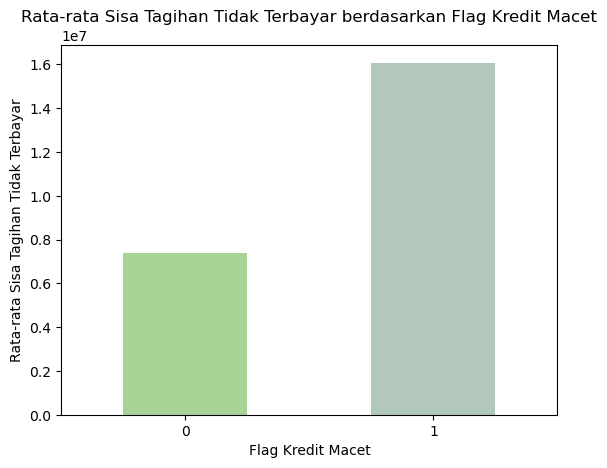

In [13]:
data_grouped = train_original.groupby('flag_kredit_macet')['sisa_tagihan_tidak_terbayar'].mean()
data_grouped.plot(kind='bar', color=['#A7D397', '#B2C8BA'])  
plt.title('Rata-rata Sisa Tagihan Tidak Terbayar berdasarkan Flag Kredit Macet')
plt.xlabel('Flag Kredit Macet')
plt.ylabel('Rata-rata Sisa Tagihan Tidak Terbayar')
plt.xticks(rotation=0)
plt.show()


Berdasarkan plot diatas, orang yang kreditnya macet memiliki rata-rata sisa tagihan yang tidak terbayar sebesar 16 juta, sedangkan yang kreditnya lancar sebesar 8 juta. Ini mengindikasikan bahwa jika sisa tagihan tidak terbayar lebih dari 8 juta, ada kemungkinan kreditnya akan macet.  

In [14]:
print('Dimensi Training data: ', train_original.shape)
train_original.head()


Dimensi Training data:  (15493, 24)


,X,jumlah_kartu,outstanding,limit_kredit,tagihan,total_pemakaian_tunai,total_pemakaian_retail,sisa_tagihan_tidak_terbayar,kode_cabang,rasio_pembayaran,persentasi_overlimit,rasio_pembayaran_3bulan,rasio_pembayaran_6bulan,skor_delikuensi,flag_kredit_macet,jumlah_tahun_sejak_pembukaan_kredit,total_pemakaian,sisa_tagihan_per_jumlah_kartu,sisa_tagihan_per_limit,total_pemakaian_per_limit,pemakaian_3bln_per_limit,pemakaian_6bln_per_limit,utilisasi_3bulan,utilisasi_6bulan
0,1,2,36158,7000000.0,23437.0,0.0,94.0,26323.0,I,102.19,0.0,74.78,100.00,0,0,15.416667,94.0,13161.5,0.003760,0.000013,0.011719,0.017810,0.013228,0.021949
1,2,2,268691,10000000.0,254564.0,0.0,1012.0,0.0,A,0.00,0.0,0.00,0.00,0,0,0.750000,1012.0,0.0,0.000000,0.000101,0.000000,0.000000,0.004232,0.000300
2,3,3,6769149,28000000.0,4159779.0,0.0,0.0,0.0,A,100.00,0.0,100.00,100.91,0,0,10.750000,0.0,0.0,0.000000,0.000000,0.040518,0.047703,0.249389,0.267853
3,4,4,3496732,21000000.0,111231.0,0.0,2536660.0,581334.0,G,100.00,0.0,25.01,22.64,0,0,19.750000,2536660.0,145333.5,0.027683,0.120793,0.055971,0.016851,0.101912,0.346635
4,5,2,9402085,10000000.0,6099283.0,0.0,2666558.0,5951865.0,A,95.99,0.0,97.49,99.84,0,0,1.666667,2666558.0,2975932.5,0.595186,0.266656,0.323027,0.131162,0.707865,0.336571


In [15]:
train_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15493 entries, 0 to 15492
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   X                                    15493 non-null  int64  
 1   jumlah_kartu                         15493 non-null  int64  
 2   outstanding                          15493 non-null  int64  
 3   limit_kredit                         15493 non-null  float64
 4   tagihan                              15493 non-null  float64
 5   total_pemakaian_tunai                15493 non-null  float64
 6   total_pemakaian_retail               15493 non-null  float64
 7   sisa_tagihan_tidak_terbayar          15493 non-null  float64
 8   kode_cabang                          15393 non-null  object 
 9   rasio_pembayaran                     15493 non-null  float64
 10  persentasi_overlimit                 15493 non-null  float64
 11  rasio_pembayaran_3bulan     

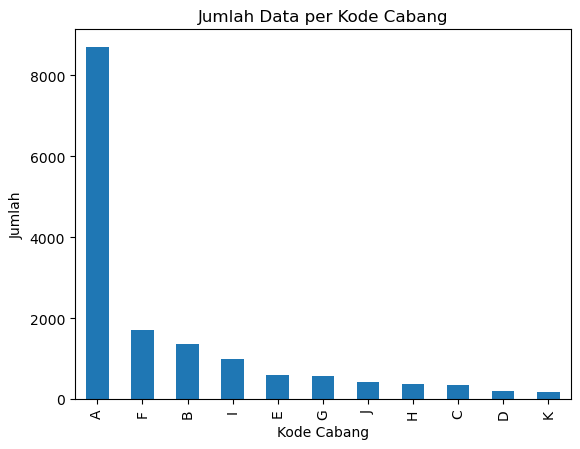

In [16]:
train_original['kode_cabang'].value_counts().plot(kind='bar')
plt.xlabel('Kode Cabang')
plt.ylabel('Jumlah')
plt.title('Jumlah Data per Kode Cabang')
plt.show()

Dilihat dari plot jumlah cabang diatas, terlihat sangat jelas cabang A mempunyai jumlah paling banyak dan K memiliki jumlah paling sedikit.

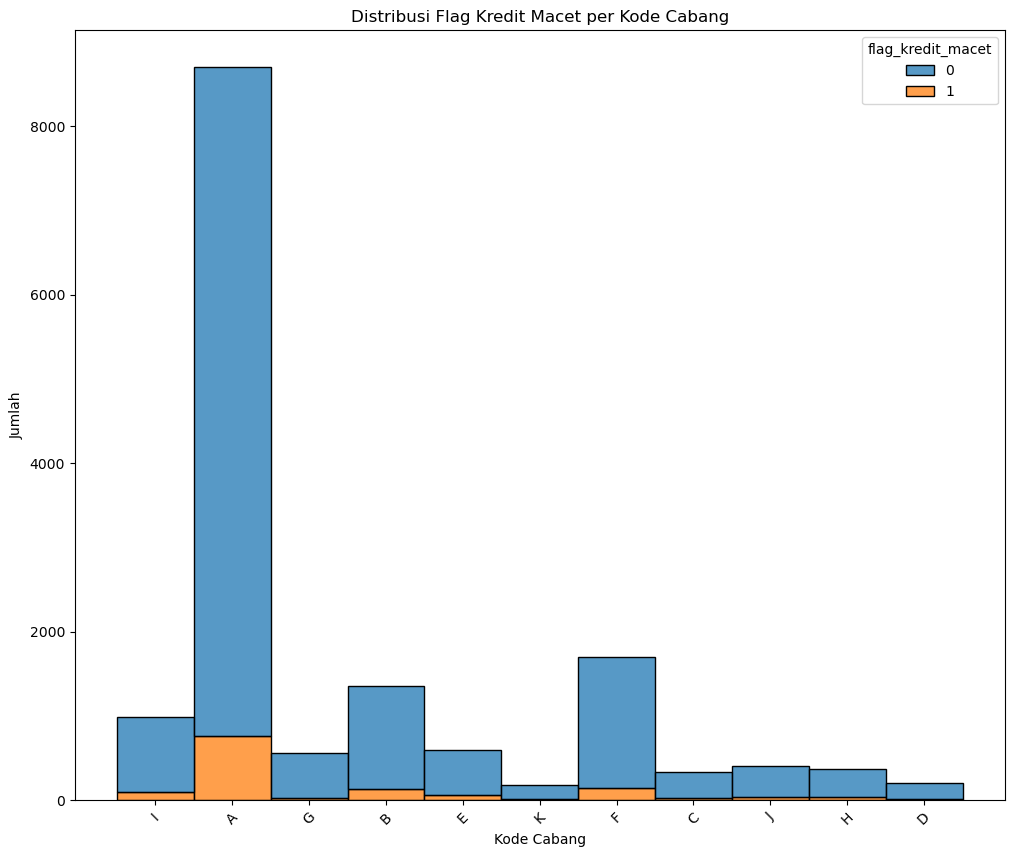

In [17]:
plt.figure(figsize=(12, 10))
sns.histplot(data=train_original, x='kode_cabang', hue='flag_kredit_macet', multiple='stack')
plt.xlabel('Kode Cabang')
plt.ylabel('Jumlah')
plt.title('Distribusi Flag Kredit Macet per Kode Cabang')
plt.xticks(rotation=45)
plt.show()

Berdasarkan plot diatas, bisa dilihat bahwa cabang A memiliki rasio orang yang paling banyak kredit macetnya, yaitu sekitar 10% dari jumlah seluruh orang di cabang A. untuk peringkat ke-2 dipegang oleh B dan ke-3 dipegang oleh F. 

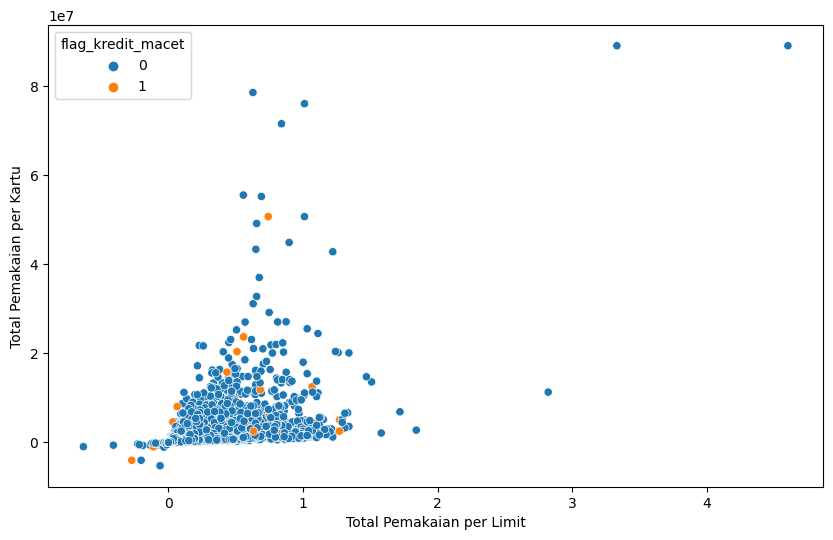

In [18]:
# Membuat kolom baru 'total_pemakaian_perkartu' dengan perhitungan yang sesuai
total_pemakaian_perkartu = train_original['total_pemakaian'] / train_original['jumlah_kartu']

# Membuat plot dengan Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x=train_original['total_pemakaian_per_limit'], y=total_pemakaian_perkartu, hue=train_original['flag_kredit_macet'])

# Menambahkan label sumbu x dan y
plt.xlabel('Total Pemakaian per Limit')
plt.ylabel('Total Pemakaian per Kartu')

# Menampilkan plot
plt.show()


Berdasarkan plot diatas, dapat dilihat bahwa kebanyakan yang kreditnya macet, memiliki total pemakaian per kartu antara 0 sampai 3 dan memiliki total pemakaian antara 0 sampai 1,5

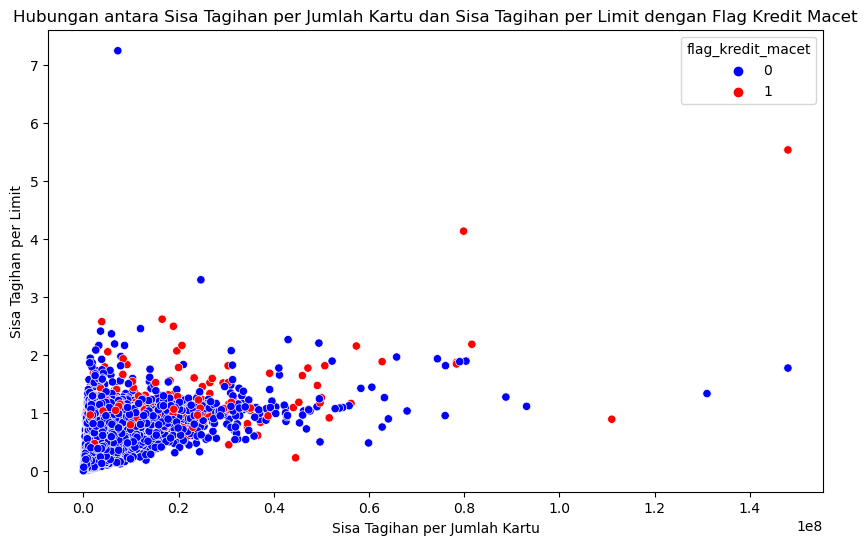

In [19]:
plt.figure(figsize=(10, 6))

# Scatter plot untuk 'sisa_tagihan_per_jumlah_kartu' dan 'sisa_tagihan_per_limit' dengan warna berdasarkan 'flag_kredit_macet'
sns.scatterplot(data=train_original, x='sisa_tagihan_per_jumlah_kartu', y='sisa_tagihan_per_limit', hue='flag_kredit_macet', palette={0: 'blue', 1: 'red'})
plt.xlabel('Sisa Tagihan per Jumlah Kartu')
plt.ylabel('Sisa Tagihan per Limit')
plt.title('Hubungan antara Sisa Tagihan per Jumlah Kartu dan Sisa Tagihan per Limit dengan Flag Kredit Macet')

plt.show()

Berdasarkan plot diatas, dapat dilihat bahwa kebanyakan yang kreditnya macet, memiliki sisa tagihan per limit antara 0,5 sampai 3 dan memiliki Sisa tagihan per jumlah kartu antara 0 sampai 0,8

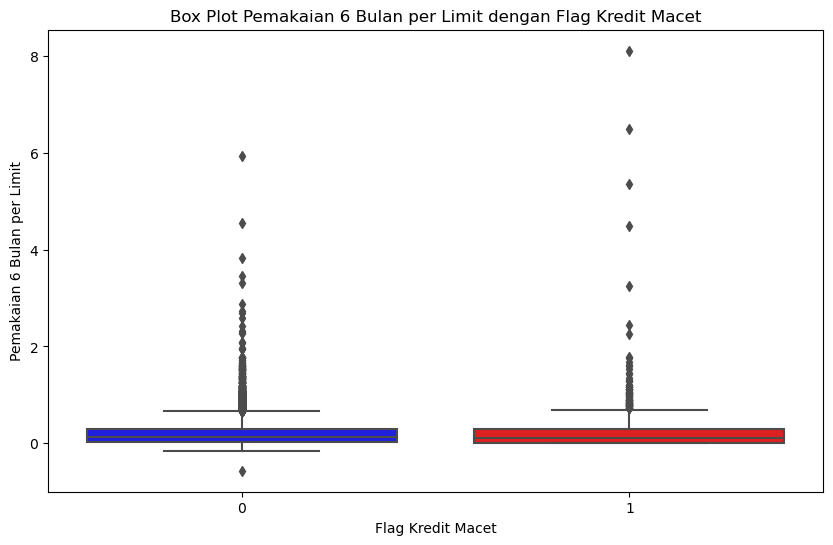

In [20]:

# Box plot untuk 'pemakaian_6bln_per_limit' dengan 'flag_kredit_macet'
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_original, x='flag_kredit_macet', y='pemakaian_6bln_per_limit', palette={0: 'blue', 1: 'red'})
plt.xlabel('Flag Kredit Macet')
plt.ylabel('Pemakaian 6 Bulan per Limit')
plt.title('Box Plot Pemakaian 6 Bulan per Limit dengan Flag Kredit Macet')

plt.show() 

Berdasarkan plot diatas, dapat dilihat bahwa rentang box yang kredit macetnya dan lancar itu hampir sama, namun outlier yang kreditnya macet, kebanyakan berkumpul dibawah 2.

# Target Variable

target di sini adalah flag kredit macet.
karena bertipe kategori, maka mari kita coba lihat dengan frekuensi

In [21]:
print(train_original["flag_kredit_macet"].count()) 
flag_kredit_macet_count = train_original["flag_kredit_macet"].value_counts()

# Membuat kode untuk perbandingan jumlah 1 dan 0
comparison_code = f"Ga Macet {flag_kredit_macet_count[0]} : Macet {flag_kredit_macet_count[1]}"

print(comparison_code)

15493
Ga Macet 14134 : Macet 1359


Dari antara 15493 flag_kredit_macet :
- Tidak macet : 14134 
- Macet : 1359 

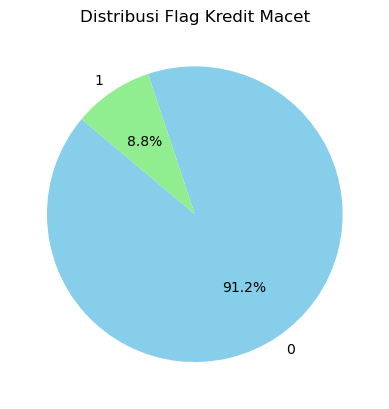

In [22]:
# Menghitung jumlah setiap nilai dalam kolom "flag_kredit_macet"
flag_kredit_macet_count = train_original['flag_kredit_macet'].value_counts()

# Membuat pie chart
plt.pie(flag_kredit_macet_count, labels=flag_kredit_macet_count.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen'])
plt.title('Distribusi Flag Kredit Macet') 
plt.show()

Sebesar 1359 (sekitar 8.8%) kredit dari 15493 kredit adalah kredit macet.

# Independent Variable (Numerical)

Numerical features: berisi nilai angka

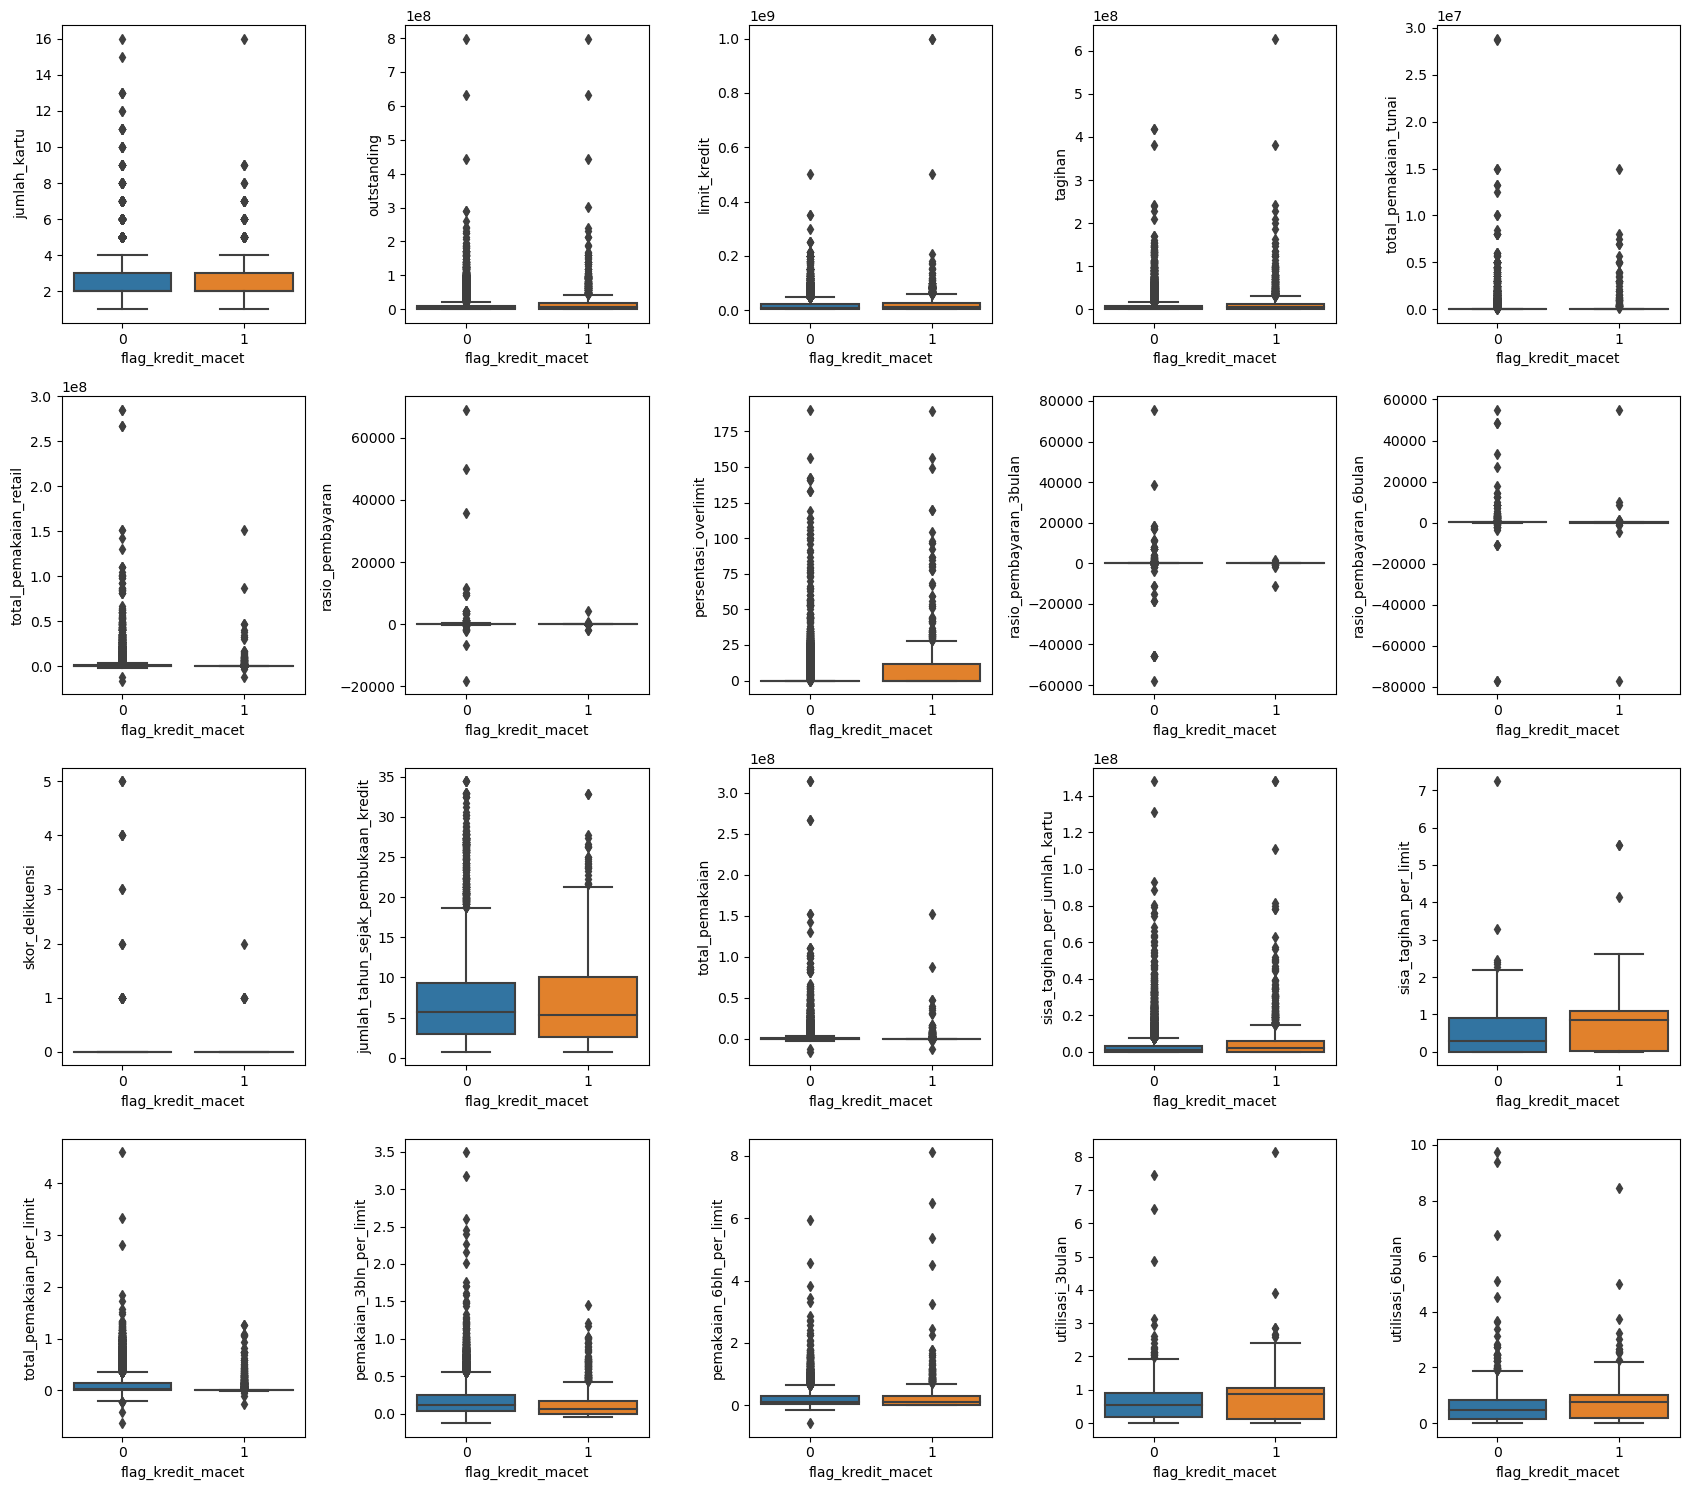

In [23]:
numeric_columns = [
    'jumlah_kartu', 'outstanding', 'limit_kredit', 'tagihan',
    'total_pemakaian_tunai', 'total_pemakaian_retail',
    'rasio_pembayaran', 'persentasi_overlimit', 'rasio_pembayaran_3bulan',
    'rasio_pembayaran_6bulan', 'skor_delikuensi', 'jumlah_tahun_sejak_pembukaan_kredit',
    'total_pemakaian', 'sisa_tagihan_per_jumlah_kartu', 'sisa_tagihan_per_limit',
    'total_pemakaian_per_limit', 'pemakaian_3bln_per_limit', 'pemakaian_6bln_per_limit',
    'utilisasi_3bulan', 'utilisasi_6bulan'
]

fig, axes = plt.subplots(4, 5, figsize=(17, 15))
for idx, cat_col in enumerate(numeric_columns):
    sns.boxplot(y=cat_col, data=train_original, x='flag_kredit_macet', ax=axes[idx // 5, idx % 5])
    axes[idx // 5, idx % 5].set_xlabel('flag_kredit_macet')
    axes[idx // 5, idx % 5].set_ylabel(cat_col)

plt.tight_layout()
plt.show()


## Split data

In [24]:
from sklearn.model_selection import train_test_split

# Memisahkan data train_original menjadi data train (80%) dan data test (20%)
train, test = train_test_split(train_original, test_size=0.2, random_state=1)

## OneHot kode cabang

In [25]:
# isi X dengan variabel fiture
X_train = train.drop("flag_kredit_macet", axis=1)
X_test = test.drop("flag_kredit_macet", axis=1)

In [26]:
# one hot encodeing kode_cabang
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)


In [27]:
# isi y dengan variabel target
y_train = train[["flag_kredit_macet"]]
y_test = test[['flag_kredit_macet']]

# Membangun Model

## XGBOOST

In [28]:

import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
xgb_model = XGBClassifier(n_estimators=50,max_depth=15)
xgb_model.fit(X_train,y_train)
pred_xgb=xgb_model.predict(X_test)
score_xgb = accuracy_score(pred_xgb,y_test)*100
print("Akurasi : ", score_xgb)
print(classification_report(y_test, pred_xgb))

Akurasi :  91.28751210067763
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      2821
           1       0.54      0.18      0.27       278

    accuracy                           0.91      3099
   macro avg       0.73      0.58      0.61      3099
weighted avg       0.89      0.91      0.89      3099



In [29]:
from sklearn.ensemble import RandomForestClassifier

# Buat objek RandomForestClassifier
random_forest_model = RandomForestClassifier()

# Latih model pada data pelatihan
random_forest_model.fit(X_train, y_train)

# Evaluasi model (opsional) dengan data cross-validation
accuracy = random_forest_model.score(X_test, y_test)
print(f"Akurasi Model: {accuracy * 100:}%")
from sklearn.metrics import classification_report

# Buat prediksi dengan model Random Forest pada data cross-validation
y_pred = random_forest_model.predict(X_test)

# Hitung metrik evaluasi
report = classification_report(y_test, y_pred)

# Tampilkan laporan metrik evaluasi
print("Metrik Evaluasi:\n", report)

Akurasi Model: 91.35204904808003%
Metrik Evaluasi:
               precision    recall  f1-score   support

           0       0.92      1.00      0.95      2821
           1       0.64      0.08      0.15       278

    accuracy                           0.91      3099
   macro avg       0.78      0.54      0.55      3099
weighted avg       0.89      0.91      0.88      3099



# PRAPROSES

# Penanganan Missing Value

Setelah mengeksplorasi semua variabel dalam data kita, kita sekarang dapat memperhitungkan nilai yang hilang karena data yang hilang dapat berdampak buruk pada kinerja model.

## Missing value imputation

Pertama kita cari kolom apa yang memiliki nilai NULL

In [30]:
train.isnull().sum()

X                                       0
jumlah_kartu                            0
outstanding                             0
limit_kredit                            0
tagihan                                 0
total_pemakaian_tunai                   0
total_pemakaian_retail                  0
sisa_tagihan_tidak_terbayar             0
kode_cabang                            78
rasio_pembayaran                        0
persentasi_overlimit                    0
rasio_pembayaran_3bulan                 0
rasio_pembayaran_6bulan                 0
skor_delikuensi                         0
flag_kredit_macet                       0
jumlah_tahun_sejak_pembukaan_kredit     0
total_pemakaian                         0
sisa_tagihan_per_jumlah_kartu           0
sisa_tagihan_per_limit                  0
total_pemakaian_per_limit               0
pemakaian_3bln_per_limit                0
pemakaian_6bln_per_limit                0
utilisasi_3bulan                        0
utilisasi_6bulan                  

In [31]:
test.isnull().sum()

X                                       0
jumlah_kartu                            0
outstanding                             0
limit_kredit                            0
tagihan                                 0
total_pemakaian_tunai                   0
total_pemakaian_retail                  0
sisa_tagihan_tidak_terbayar             0
kode_cabang                            22
rasio_pembayaran                        0
persentasi_overlimit                    0
rasio_pembayaran_3bulan                 0
rasio_pembayaran_6bulan                 0
skor_delikuensi                         0
flag_kredit_macet                       0
jumlah_tahun_sejak_pembukaan_kredit     0
total_pemakaian                         0
sisa_tagihan_per_jumlah_kartu           0
sisa_tagihan_per_limit                  0
total_pemakaian_per_limit               0
pemakaian_3bln_per_limit                0
pemakaian_6bln_per_limit                0
utilisasi_3bulan                        0
utilisasi_6bulan                  

Yang memiliki nilai NULL hanya terdapat pada kolom kode_cabang

In [32]:
train['kode_cabang'].unique()

array(['J', 'G', 'A', 'E', 'I', 'F', 'B', 'D', 'C', nan, 'H', 'K'],
      dtype=object)

In [33]:
test['kode_cabang'].unique()

array(['A', 'J', 'E', 'G', 'C', 'I', 'F', 'D', 'B', nan, 'H', 'K'],
      dtype=object)

Kita akan menangani nilai yang hilang di semua fitur satu per satu.

Kita dapat mempertimbangkan metode-metode ini untuk mengisi nilai yang hilang:

- variabel numerik: imputasi menggunakan mean atau median
- variabel kategorikal: imputasi menggunakan modus

Karena yang memiliki nilai NULL hanya pada kolom kode_cabang dan kode_cabang merupakan variabel kategorikal maka kita mengisinya dengan modus

In [34]:
train["kode_cabang"].fillna(train["kode_cabang"].mode()[0],inplace=True)
test["kode_cabang"].fillna(test["kode_cabang"].mode()[0],inplace=True)

Mengecek lagi apakah nilai NULL pada kolom kode_cabang sudah terisi

In [35]:
train.isnull().sum()

X                                      0
jumlah_kartu                           0
outstanding                            0
limit_kredit                           0
tagihan                                0
total_pemakaian_tunai                  0
total_pemakaian_retail                 0
sisa_tagihan_tidak_terbayar            0
kode_cabang                            0
rasio_pembayaran                       0
persentasi_overlimit                   0
rasio_pembayaran_3bulan                0
rasio_pembayaran_6bulan                0
skor_delikuensi                        0
flag_kredit_macet                      0
jumlah_tahun_sejak_pembukaan_kredit    0
total_pemakaian                        0
sisa_tagihan_per_jumlah_kartu          0
sisa_tagihan_per_limit                 0
total_pemakaian_per_limit              0
pemakaian_3bln_per_limit               0
pemakaian_6bln_per_limit               0
utilisasi_3bulan                       0
utilisasi_6bulan                       0
dtype: int64

In [36]:
test.isnull().sum()

X                                      0
jumlah_kartu                           0
outstanding                            0
limit_kredit                           0
tagihan                                0
total_pemakaian_tunai                  0
total_pemakaian_retail                 0
sisa_tagihan_tidak_terbayar            0
kode_cabang                            0
rasio_pembayaran                       0
persentasi_overlimit                   0
rasio_pembayaran_3bulan                0
rasio_pembayaran_6bulan                0
skor_delikuensi                        0
flag_kredit_macet                      0
jumlah_tahun_sejak_pembukaan_kredit    0
total_pemakaian                        0
sisa_tagihan_per_jumlah_kartu          0
sisa_tagihan_per_limit                 0
total_pemakaian_per_limit              0
pemakaian_3bln_per_limit               0
pemakaian_6bln_per_limit               0
utilisasi_3bulan                       0
utilisasi_6bulan                       0
dtype: int64

In [37]:
train['kode_cabang'].unique()

array(['J', 'G', 'A', 'E', 'I', 'F', 'B', 'D', 'C', 'H', 'K'],
      dtype=object)

In [38]:
test['kode_cabang'].unique()

array(['A', 'J', 'E', 'G', 'C', 'I', 'F', 'D', 'B', 'H', 'K'],
      dtype=object)

In [39]:
test.isnull().sum()

X                                      0
jumlah_kartu                           0
outstanding                            0
limit_kredit                           0
tagihan                                0
total_pemakaian_tunai                  0
total_pemakaian_retail                 0
sisa_tagihan_tidak_terbayar            0
kode_cabang                            0
rasio_pembayaran                       0
persentasi_overlimit                   0
rasio_pembayaran_3bulan                0
rasio_pembayaran_6bulan                0
skor_delikuensi                        0
flag_kredit_macet                      0
jumlah_tahun_sejak_pembukaan_kredit    0
total_pemakaian                        0
sisa_tagihan_per_jumlah_kartu          0
sisa_tagihan_per_limit                 0
total_pemakaian_per_limit              0
pemakaian_3bln_per_limit               0
pemakaian_6bln_per_limit               0
utilisasi_3bulan                       0
utilisasi_6bulan                       0
dtype: int64

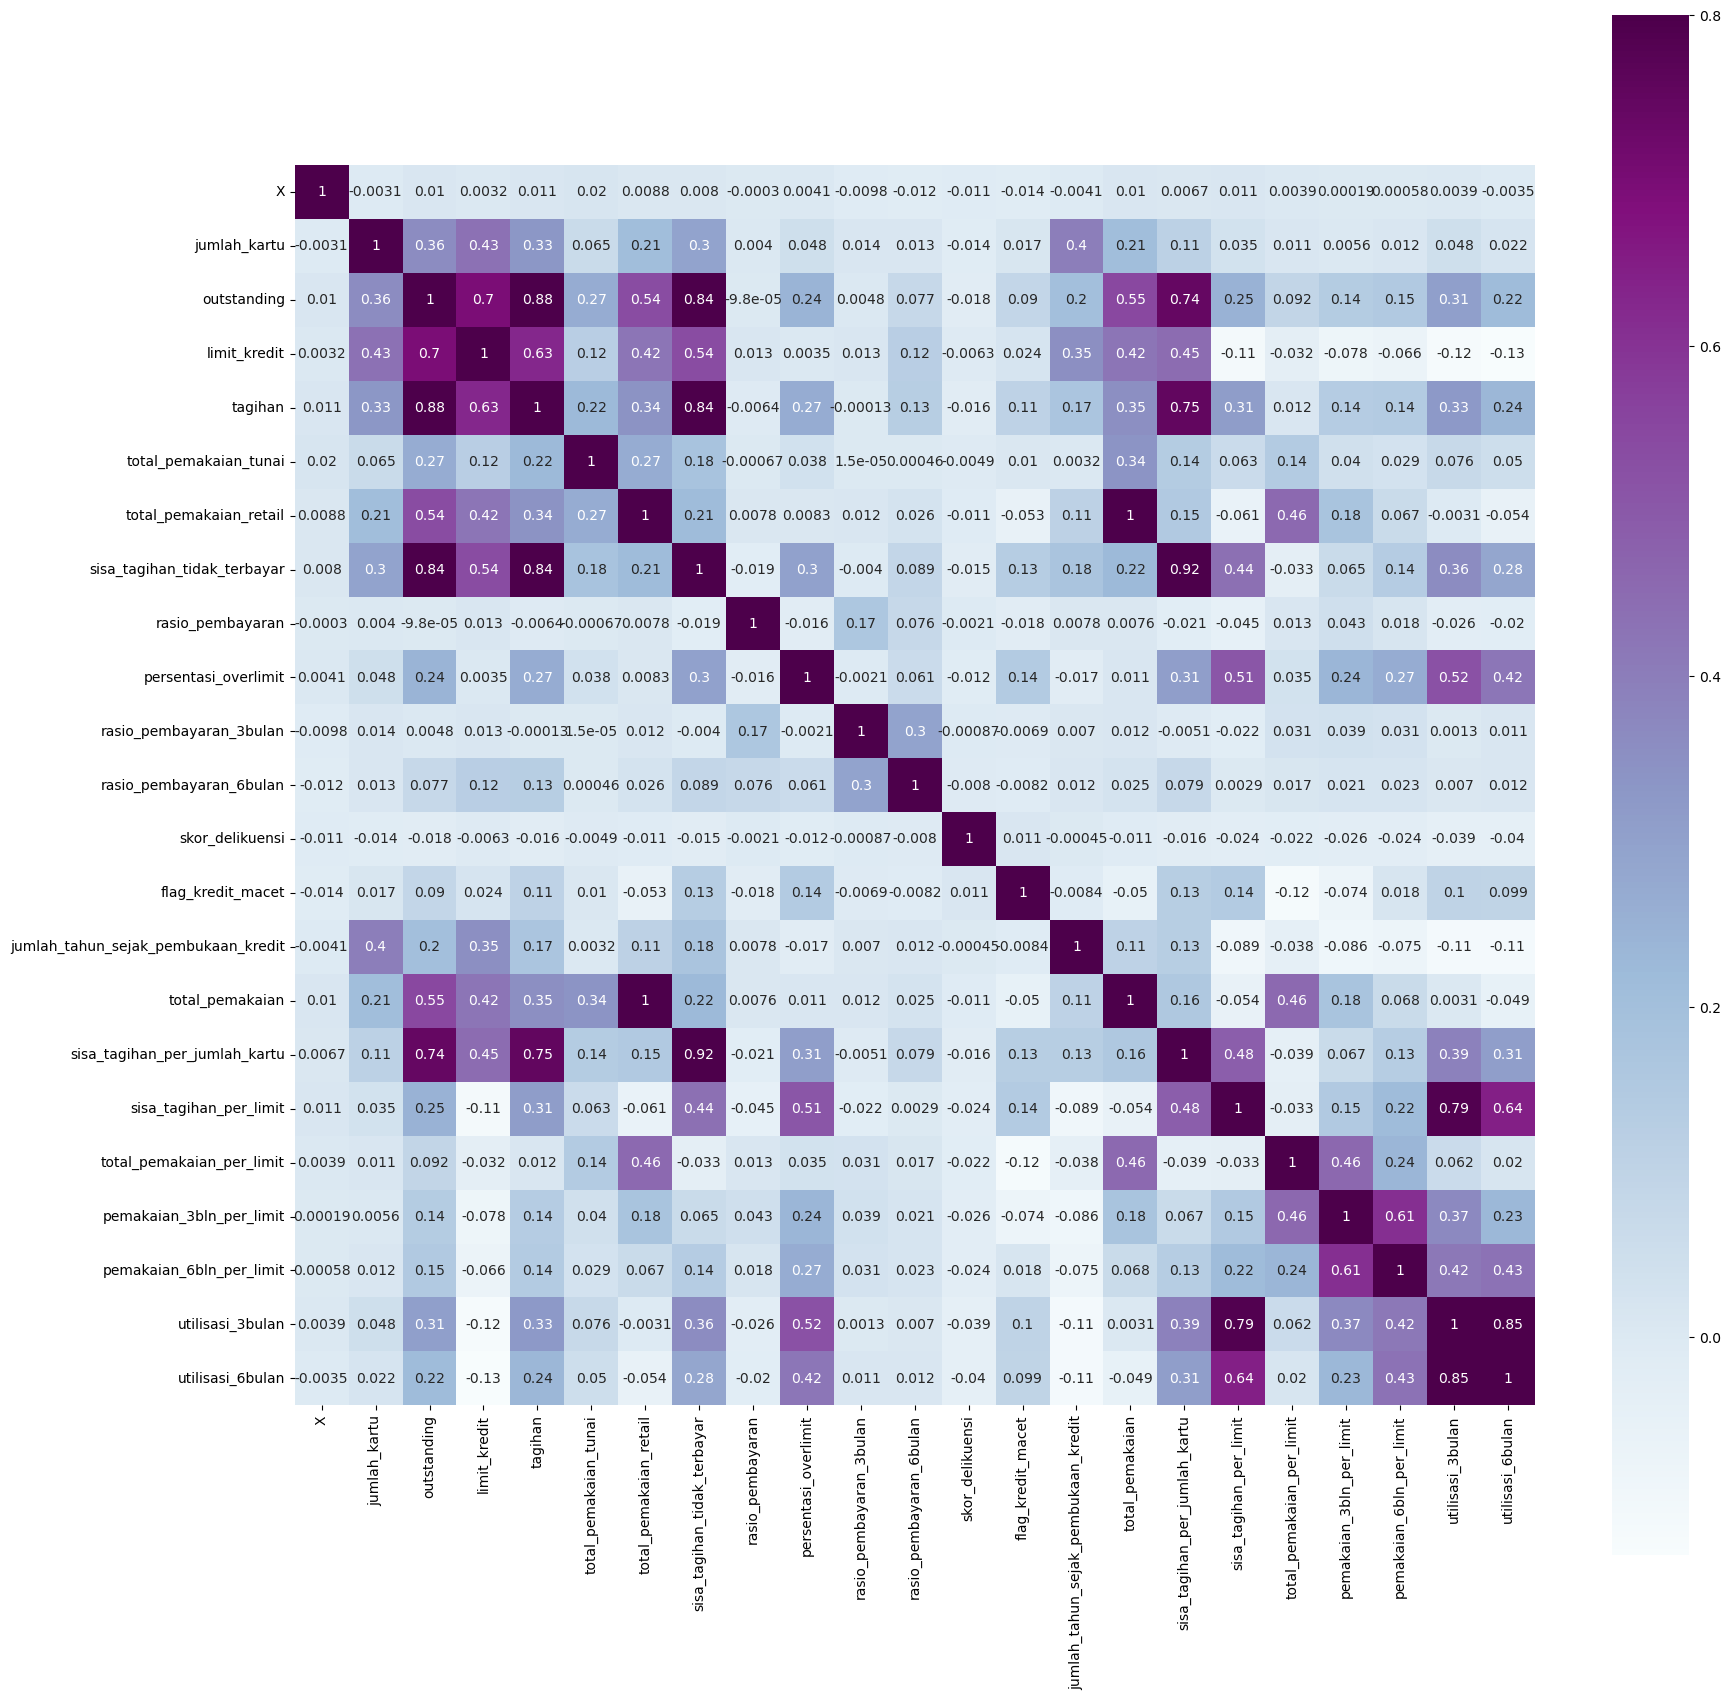

In [40]:
matrix = train.corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu",annot=True);

### Menghapus Index X karena Tidak mempunyai keterkaitan dengan flag_kredit_macet

In [41]:
train.drop("X", axis=1, inplace=True)
test.drop("X", axis=1, inplace=True)

### Mengganti data yang negatif menjadi Absolute

In [42]:
train["pemakaian_3bln_per_limit"] = abs(train["pemakaian_3bln_per_limit"])
train["total_pemakaian_per_limit"] = abs(train["total_pemakaian_per_limit"])
train["total_pemakaian"] = abs(train["total_pemakaian"])
train["pemakaian_6bln_per_limit"] = abs(train["pemakaian_6bln_per_limit"])
train["rasio_pembayaran_3bulan"] = abs(train["rasio_pembayaran_3bulan"])
train["rasio_pembayaran_6bulan"] = abs(train["rasio_pembayaran_6bulan"])
train["rasio_pembayaran"] = abs(train["rasio_pembayaran"])
train["total_pemakaian_retail"] = abs(train["total_pemakaian_retail"])

test["pemakaian_3bln_per_limit"] = abs(test["pemakaian_3bln_per_limit"])
test["total_pemakaian_per_limit"] = abs(test["total_pemakaian_per_limit"])
test["total_pemakaian"] = abs(test["total_pemakaian"])
test["pemakaian_6bln_per_limit"] = abs(test["pemakaian_6bln_per_limit"])
test["rasio_pembayaran_3bulan"] = abs(test["rasio_pembayaran_3bulan"])
test["rasio_pembayaran_6bulan"] = abs(test["rasio_pembayaran_6bulan"])
test["rasio_pembayaran"] = abs(test["rasio_pembayaran"])
test["total_pemakaian_retail"] = abs(test["total_pemakaian_retail"])

In [43]:
train.head()

,jumlah_kartu,outstanding,limit_kredit,tagihan,total_pemakaian_tunai,total_pemakaian_retail,sisa_tagihan_tidak_terbayar,kode_cabang,rasio_pembayaran,persentasi_overlimit,rasio_pembayaran_3bulan,rasio_pembayaran_6bulan,skor_delikuensi,flag_kredit_macet,jumlah_tahun_sejak_pembukaan_kredit,total_pemakaian,sisa_tagihan_per_jumlah_kartu,sisa_tagihan_per_limit,total_pemakaian_per_limit,pemakaian_3bln_per_limit,pemakaian_6bln_per_limit,utilisasi_3bulan,utilisasi_6bulan
10621,2,2888699,3000000.0,2888658.0,0.0,11169.0,0.0,J,100.0,0.0,100.0,70.5,0,0,2.00,11169.0,0.0,0.0000,0.00372,0.359,0.413,0.802,0.409
5687,2,3698350,23000000.0,2504373.0,0.0,1259200.0,0.0,G,100.0,0.0,100.0,100.0,0,0,8.92,1259200.0,0.0,0.0000,0.05470,0.317,0.331,0.260,0.397
10046,2,4820569,5000000.0,4680828.0,0.0,18703.0,0.0,G,100.0,0.0,59.0,91.3,0,0,4.33,18703.0,0.0,0.0000,0.00374,0.521,0.226,0.724,0.212
14583,3,3102139,12000000.0,952332.0,0.0,2540996.0,2866218.0,A,0.0,0.0,75.0,100.0,0,0,5.83,2540996.0,955406.0,0.2390,0.21200,0.089,0.221,0.227,0.283
5503,2,166380,3000000.0,142895.0,0.0,0.0,176324.0,E,100.0,0.0,28.8,42.8,0,0,6.58,0.0,88162.0,0.0588,0.00000,0.000,0.277,0.414,0.535


In [44]:
test.head()

,jumlah_kartu,outstanding,limit_kredit,tagihan,total_pemakaian_tunai,total_pemakaian_retail,sisa_tagihan_tidak_terbayar,kode_cabang,rasio_pembayaran,persentasi_overlimit,rasio_pembayaran_3bulan,rasio_pembayaran_6bulan,skor_delikuensi,flag_kredit_macet,jumlah_tahun_sejak_pembukaan_kredit,total_pemakaian,sisa_tagihan_per_jumlah_kartu,sisa_tagihan_per_limit,total_pemakaian_per_limit,pemakaian_3bln_per_limit,pemakaian_6bln_per_limit,utilisasi_3bulan,utilisasi_6bulan
3576,2,8096704,8000000.0,4073734.0,0.0,1901025.0,5213854.0,A,65.5,1.24,37.90,32.20,0,0,2.750,1901025.0,2606927.0,0.652,0.2380,0.19200,0.0436,0.972000,0.62800
8564,2,684568,8000000.0,47263.0,0.0,538655.0,0.0,J,100.0,0.00,100.00,100.00,0,0,3.670,538655.0,0.0,0.000,0.0673,0.02750,0.1350,0.117000,0.15800
13670,3,3617686,11000000.0,1933276.0,0.0,586000.0,3155317.0,A,100.0,0.00,100.00,100.00,0,0,5.750,586000.0,1051772.0,0.287,0.0533,0.12800,0.0864,0.359000,0.26700
13243,2,3110979,3000000.0,3007042.0,0.0,100000.0,3097253.0,E,10.1,3.84,12.40,13.20,0,0,0.917,100000.0,1548627.0,1.030,0.0333,0.00293,0.0000,0.971000,1.01000
804,2,139723,4000000.0,148961.0,0.0,0.0,0.0,A,0.0,0.00,39.46,41.52,0,0,11.250,0.0,0.0,0.000,0.0000,0.00000,0.0000,0.065723,0.34326


# Penanganan Data Imbalance data pada data train

In [45]:
print(train["flag_kredit_macet"].count()) 
flag_kredit_macet_count = train["flag_kredit_macet"].value_counts()

# Membuat kode untuk perbandingan jumlah 1 dan 0
comparison_code = f"Ga Macet {flag_kredit_macet_count[0]} : Macet {flag_kredit_macet_count[1]}"

print(comparison_code)

12394
Ga Macet 11313 : Macet 1081


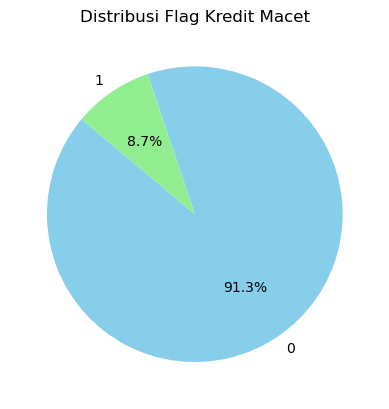

In [46]:
# Menghitung jumlah setiap nilai dalam kolom "flag_kredit_macet"
flag_kredit_macet_count = train['flag_kredit_macet'].value_counts()

# Membuat pie chart
plt.pie(flag_kredit_macet_count, labels=flag_kredit_macet_count.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen'])
plt.title('Distribusi Flag Kredit Macet') 
plt.show()

Dapat dilihat dari plot diatas rasio antara kredit macet dan yang tidak macet, kredit macet sekitar 8,7% dan kredit yang tidak macet 91,3%

# Membangun Model :

### Imbalancing Data Train

In [47]:
# isi X dan Y baru dengan yang sudah di praproses 
X_train = train.drop("flag_kredit_macet", axis=1)
y_train = train[["flag_kredit_macet"]]
X_test = test.drop("flag_kredit_macet", axis=1)
y_test = test[["flag_kredit_macet"]]

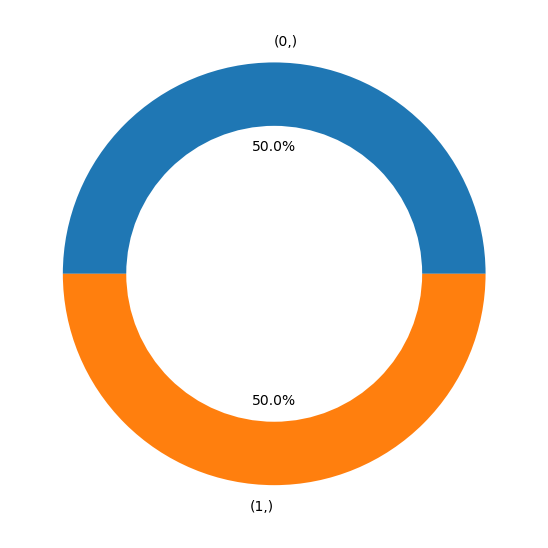

In [48]:
from imblearn.over_sampling import RandomOverSampler
rus = RandomOverSampler()
X_train, y_train = rus.fit_resample(X_train,y_train)

plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
y_train.value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)

In [49]:
print(y_train["flag_kredit_macet"].count()) 
flag_kredit_macet_count = y_train["flag_kredit_macet"].value_counts()

# Membuat kode untuk perbandingan jumlah 1 dan 0
comparison_code = f"Ga Macet {flag_kredit_macet_count[0]} : Macet {flag_kredit_macet_count[1]}"

print(comparison_code)

22626
Ga Macet 11313 : Macet 11313


### One hot encoding

In [50]:
# one hot encodeing kode_cabang
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)


In [51]:
X_test.head()

,jumlah_kartu,outstanding,limit_kredit,tagihan,total_pemakaian_tunai,total_pemakaian_retail,sisa_tagihan_tidak_terbayar,rasio_pembayaran,persentasi_overlimit,rasio_pembayaran_3bulan,rasio_pembayaran_6bulan,skor_delikuensi,...,utilisasi_6bulan,kode_cabang_A,kode_cabang_B,kode_cabang_C,kode_cabang_D,kode_cabang_E,kode_cabang_F,kode_cabang_G,kode_cabang_H,kode_cabang_I,kode_cabang_J,kode_cabang_K
3576,2,8096704,8000000.0,4073734.0,0.0,1901025.0,5213854.0,65.5,1.24,37.90,32.20,0,...,0.62800,1,0,0,0,0,0,0,0,0,0,0
8564,2,684568,8000000.0,47263.0,0.0,538655.0,0.0,100.0,0.00,100.00,100.00,0,...,0.15800,0,0,0,0,0,0,0,0,0,1,0
13670,3,3617686,11000000.0,1933276.0,0.0,586000.0,3155317.0,100.0,0.00,100.00,100.00,0,...,0.26700,1,0,0,0,0,0,0,0,0,0,0
13243,2,3110979,3000000.0,3007042.0,0.0,100000.0,3097253.0,10.1,3.84,12.40,13.20,0,...,1.01000,0,0,0,0,1,0,0,0,0,0,0
804,2,139723,4000000.0,148961.0,0.0,0.0,0.0,0.0,0.00,39.46,41.52,0,...,0.34326,1,0,0,0,0,0,0,0,0,0,0


### XGBOOST

In [52]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
xgb_model = XGBClassifier(n_estimators=50,max_depth=15)
xgb_model.fit(X_train,y_train)
pred_xgb=xgb_model.predict(X_test)
score_xgb = accuracy_score(pred_xgb,y_test)*100
print("Akurasi : ", score_xgb)
print(classification_report(y_test, pred_xgb))

Akurasi :  90.57760567925138
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      2821
           1       0.46      0.27      0.34       278

    accuracy                           0.91      3099
   macro avg       0.69      0.62      0.64      3099
weighted avg       0.89      0.91      0.89      3099



### RandomForest

In [53]:
from sklearn.ensemble import RandomForestClassifier

# Buat objek RandomForestClassifier
random_forest_model = RandomForestClassifier()

# Latih model pada data pelatihan
random_forest_model.fit(X_train, y_train)

# Evaluasi model (opsional) dengan data cross-validation
accuracy = random_forest_model.score(X_test, y_test)
print(f"Akurasi Model: {accuracy * 100:}%")
from sklearn.metrics import classification_report

# Buat prediksi dengan model Random Forest pada data cross-validation
y_pred = random_forest_model.predict(X_test)

# Hitung metrik evaluasi
report = classification_report(y_test, y_pred)

# Tampilkan laporan metrik evaluasi
print("Metrik Evaluasi:\n", report)

Akurasi Model: 90.57760567925138%
Metrik Evaluasi:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      2821
           1       0.43      0.15      0.23       278

    accuracy                           0.91      3099
   macro avg       0.68      0.57      0.59      3099
weighted avg       0.88      0.91      0.89      3099

